In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
all_filenames = [i for i in glob.glob('states*.csv')]

us_census = pd.concat([pd.read_csv(f, index_col=0) for f in all_filenames])

us_census = us_census.reset_index()

us_census.drop(columns='index', axis=1, inplace=True)

In [32]:
us_census.head(2)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093M_2489527F,2341093,2489527.0
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160M_349215F,384160,349215.0


In [4]:
us_census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [5]:
us_census.dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object

In [6]:
# split "GenderPop" column by "_" and remove "M" and "F"
gender_split = us_census.GenderPop.str.split("_")
us_census['Men'] = gender_split.str.get(0).str[:-1] # str[:-1]. at -1 loc there is M. -1 is excluded
us_census['Women'] = gender_split.str.get(1).str[:-1]

In [7]:
us_census['Men'] = pd.to_numeric(us_census['Men'])
us_census['Women'] = pd.to_numeric(us_census['Women'])

In [8]:
# remove $ sign from Income and convert it into numeric
us_census['Income'] = us_census.Income.str[1:]
us_census['Income'] = pd.to_numeric(us_census['Income'])

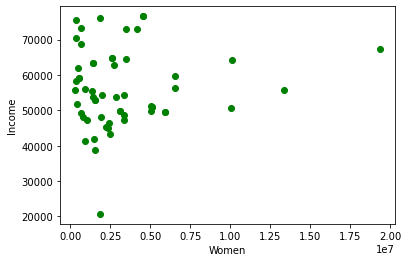

In [9]:
plt.scatter(us_census['Women'], us_census['Income'], c='green')
plt.xlabel('Women')
plt.ylabel('Income')
plt.show()

In [10]:
us_census['Women'].isna().sum()

3

In [11]:
# repalce NA values in Women column
us_census['Women'] = us_census['Women'].fillna(value=us_census.TotalPop - us_census.Men)

In [12]:
us_census['Women'].isna().sum()

0

# Plot income in a state vs proportion of women

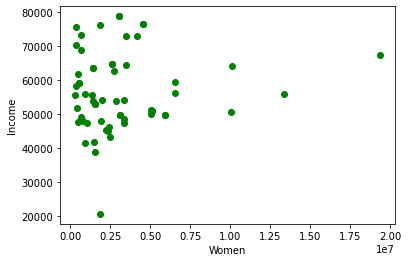

In [13]:
plt.scatter(us_census['Women'], us_census['Income'], c='green')
plt.xlabel('Women')
plt.ylabel('Income')
plt.show()

In [14]:
# check for duplicates
duplicates = us_census.duplicated(subset=['State'])
print(duplicates)
us_census = us_census.drop_duplicates()

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22    False
23    False
24     True
25    False
26    False
27    False
28    False
29    False
30     True
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41    False
42     True
43    False
44    False
45    False
46    False
47    False
48     True
49    False
50    False
51    False
52    False
53    False
54     True
55    False
56    False
57    False
58    False
59    False
dtype: bool


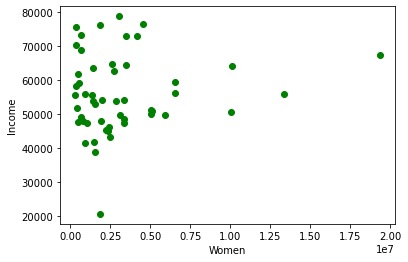

In [15]:
plt.scatter(us_census['Women'], us_census['Income'], c='green')
plt.xlabel('Women')
plt.ylabel('Income')
plt.show()

# Remove special characters from each column and convert them into numbers

In [16]:
us_census.head(2)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093,2489527.0
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160,349215.0


In [17]:
Hispanic = us_census['Hispanic'].str[:-1]
White = us_census['White'].str[:-1]
Black = us_census['Black'].str[:-1]
Native = us_census['Native'].str[:-1]
Asian = us_census['Asian'].str[:-1]
Pacific = us_census['Pacific'].str[:-1]

In [18]:
us_census['Hispanic'] = pd.to_numeric(Hispanic)
us_census['White'] = pd.to_numeric(White)
us_census['Black'] = pd.to_numeric(Black)
us_census['Native'] = pd.to_numeric(Native)
us_census['Asian'] = pd.to_numeric(Asian)
us_census['Pacific'] = pd.to_numeric(Pacific)

In [19]:
us_census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')

In [20]:
us_census = us_census.fillna(value={
    'Hispanic': us_census.Hispanic.mean(),
    'White': us_census.White.mean(),
    'Black': us_census.Black.mean(),
    'Native': us_census.Native.mean(),
    'Asian': us_census.Asian.mean(),
    'Pacific': us_census.Pacific.mean()
})

# Plot Histograms

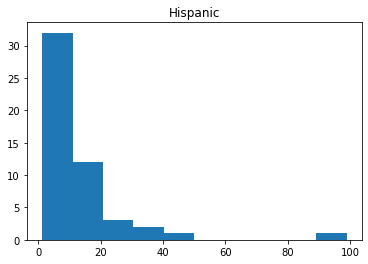

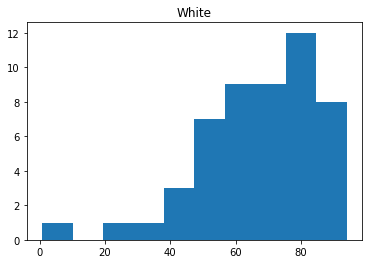

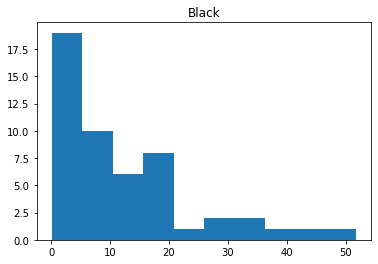

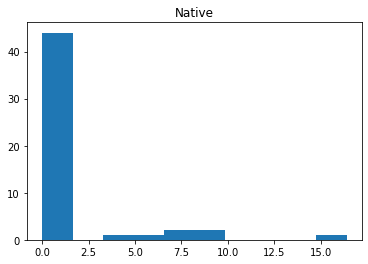

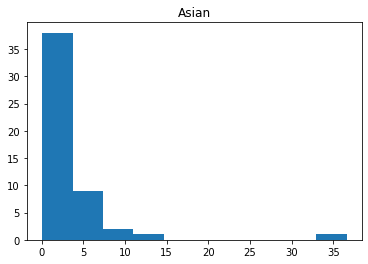

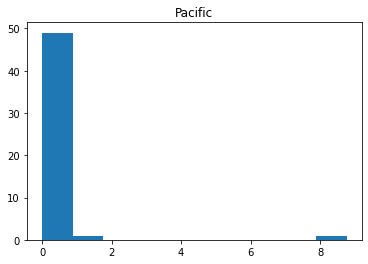

In [21]:
for i in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    plt.hist(us_census[i])
    plt.title(i)
    plt.show()

# Petal Power Inventory Analysis

In [22]:
inventory = pd.read_csv('inventory.csv')

In [23]:
inventory.head(10)

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [24]:
staten_island = inventory[:10]
staten_island

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [25]:
product_request = staten_island['product_description']
product_request

0                         daisy
1                    calla lily
2                        tomato
3                          rake
4                   wheelbarrow
5                         spade
6                 insect killer
7                   weed killer
8    20 inch terracotta planter
9        8 inch plastic planter
Name: product_description, dtype: object

In [26]:
seed_request = inventory[(inventory['location'] == 'Brooklyn') & (inventory['product_type'] == 'seeds')]
seed_request

,location,product_type,product_description,quantity,price
10,Brooklyn,seeds,daisy,50,6.99
11,Brooklyn,seeds,calla lily,0,19.99
12,Brooklyn,seeds,tomato,0,13.99


In [27]:
inventory['in_stock'] = inventory['quantity'] > 0
inventory

,location,product_type,product_description,quantity,price,in_stock
0,Staten Island,seeds,daisy,4,6.99,True
1,Staten Island,seeds,calla lily,46,19.99,True
2,Staten Island,seeds,tomato,85,13.99,True
3,Staten Island,garden tools,rake,4,13.99,True
4,Staten Island,garden tools,wheelbarrow,0,89.99,False
5,Staten Island,garden tools,spade,93,19.99,True
6,Staten Island,pest_control,insect killer,74,12.99,True
7,Staten Island,pest_control,weed killer,8,23.99,True
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False
9,Staten Island,planter,8 inch plastic planter,53,3.99,True


In [28]:
inventory['total_value'] = inventory['quantity'] * inventory['price']
inventory.head()

,location,product_type,product_description,quantity,price,in_stock,total_value
0,Staten Island,seeds,daisy,4,6.99,True,27.96
1,Staten Island,seeds,calla lily,46,19.99,True,919.54
2,Staten Island,seeds,tomato,85,13.99,True,1189.15
3,Staten Island,garden tools,rake,4,13.99,True,55.96
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00


In [29]:
combine_lambda = lambda row: '{} - {}'.format(row.product_type, row.product_description)

In [30]:
inventory['full_description'] = inventory.apply(combine_lambda, axis=1)

In [31]:
inventory

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,seeds - daisy
1,Staten Island,seeds,calla lily,46,19.99,True,919.54,seeds - calla lily
2,Staten Island,seeds,tomato,85,13.99,True,1189.15,seeds - tomato
3,Staten Island,garden tools,rake,4,13.99,True,55.96,garden tools - rake
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00,garden tools - wheelbarrow
5,Staten Island,garden tools,spade,93,19.99,True,1859.07,garden tools - spade
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26,pest_control - insect killer
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92,pest_control - weed killer
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00,planter - 20 inch terracotta planter
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47,planter - 8 inch plastic planter
